## [Public Land Survey System - PLSS:Township and Range](https://data.ca.gov/dataset/public-land-survey-system-plss-township-and-range)

- Source for geojson download
- The Township and Range coordinate system has been used since the 1790s to survey public lands in the United States. Technically, the official name of this system is the Public Land Rectangular Survey (PLS), but in practical use, most people call it Township and Range.

- Townships are rectangular blocks of land about 6 miles square. The squares are gridded and numbered according to their position north or south of the base line. 
- Ranges are columns of townships set side by side. They are numbered starting at the meridian that runs through the point of origin of each system. Ranges run east and west.
- Sections represent further divisions of a township. A township can be divided into 36 sections. Each section is about 1 square mile
- NOTE : To restrict analysis to San Joaquin basin, PLSS is take from LA Times site

[Source](https://www.nwcg.gov/course/ffm/location/611-base-township-range-sections-corners)

### Place geopandas module in requirements.txt.
- No other installation required.

In [ ]:
# load the plss shapefile (these only include TRS areas that are within the San Joaquin subbasin)
import geopandas as gpd
import pandas as pd
import gpdvega 
import altair as alt
plss = gpd.read_file(r"../assets/plss_subbasin.geojson")

/root/venv/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [ ]:
plss.sample()

,OBJECTID,Township,Range,Meridian,Source,Section,MTRS,TownshipRange,geometry
858,11057,T02N,R05E,MDM,DGR,19,MDM-T02N-R05E-19,T02N R05E,"MULTIPOLYGON (((-121.45890 37.99925, -121.4592..."


#### Convert latitude and longitude to geometry.
- [Convert the latitude and longitude to Shapely points](https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html)
- [Set the Coordinate Reference System (CRS) of the GeoDataFrame.](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_crs.html)
- The dataframe can then be joined to the PLSS geojson seen above.

## Population Density Data

TIGER/Line Shapefiles do not include demographic data, but they do contain geographic entity codes (GEOIDs) that can be linked to the Census Bureau’s demographic data, available on Explore Census Data.

[Get it here](TIGER/Line Shapefiles do not include demographic data, but they do contain geographic entity codes (GEOIDs) that can be linked to the Census Bureau’s demographic data, available on Explore Census Data.)


Data:
https://census.ca.gov/htc-map/
https://cacensus.maps.arcgis.com/apps/webappviewer/index.html?id=48be59de0ba94a3dacff1c9116df8b37

Want to download a slice of data? Go to the attribute table, zoom in to a desired area on the map or click on “options” and make a filter expression. Then click “export all to CSV.”

What I did: Click on the up arrow at the bottom of the map This brings up the data table and Export All to CSV. 


Census Data API
https://pypi.org/project/CensusData/
pip install CensusData
https://www.census.gov/content/dam/Census/library/publications/2020/acs/acs_api_handbook_2020_ch02.pdf

## Weather data

https://cdec.water.ca.gov/staInfo.html
https://cdec.water.ca.gov/reportapp/javareports?name=MonthlyPrecip

https://www.ncdc.noaa.gov/cag/county/mapping/

#### Monthly precipitation by station
Note: In power Automate I looped through 2015 through 2022 data

https://cdec.water.ca.gov/reportapp/javareports?name=PRECIPMON.2020



#### Use these three

- https://cdec.water.ca.gov/reportapp/javareports?name=MonthlyPrecip
- https://cdec.water.ca.gov/reportapp/javareports?name=PRECIPMON.2020
- https://cdec.water.ca.gov/reportapp/javareports?name=MonthlyStations
- https://maps.princeton.edu/catalog/stanford-qm900hk8690

- San Joaquin valley Shapefiles in detail
- http://sjmap.org/GISDataDownload.htm

## Charting the population at a tract level

,LAND_AREA,Tot_Population_ACS_14_18
1,0.131,5549.0
2,0.405,2856.0
3,0.956,4803.0
6,0.772,5305.0
8,0.483,3966.0
...,...,...
8053,0.297,3046.0
8054,0.610,6745.0
8055,0.920,4881.0
8056,0.618,4343.0


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,State_name,County_name,LAND_AREA,Tot_Population_ACS_14_18,state,county,tract,state_county,state_county_tract,pop_density
3243,06,075,012201,06075012201,122.01,Census Tract 122.01,G5020,S,92048,0,...,California,San Francisco County,0.036,4638.0,06,075,012201,6075,6075012201,128833.333333
3493,06,075,012502,06075012502,125.02,Census Tract 125.02,G5020,S,61275,0,...,California,San Francisco County,0.024,3584.0,06,075,012502,6075,6075012502,149333.333333
6566,06,075,011901,06075011901,119.01,Census Tract 119.01,G5020,S,62294,0,...,California,San Francisco County,0.024,2674.0,06,075,011901,6075,6075011901,111416.666667
6637,06,075,012401,06075012401,124.01,Census Tract 124.01,G5020,S,91972,0,...,California,San Francisco County,0.036,4782.0,06,075,012401,6075,6075012401,132833.333333


In [ ]:
#To overcome max_rows issue
alt.data_transformers.enable('json')
alt.data_transformers.disable_max_rows()

In [ ]:
#Example Python code
import gpdvega 
import altair as alt

agri_gdf = gpd.read_file(r"/work/assets/SJ_Agricultural_Preserves/AgriculturalPreserves.shp")
alt.Chart(agri_gdf).mark_geoshape(
).encode( 
    color='PRESERVE_N', 
    tooltip=['PRESERVE_N','CREATED_US']
).properties( 
    width=500,
    height=300
)

alt.Chart(...)

<AxesSubplot:>

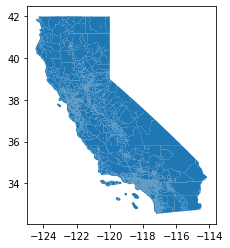

In [ ]:
source_df.plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b042e2da-6536-449d-95b8-d85fa08825de' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>